In [1]:
from kuramoto import Kuramoto
from kuramoto.nmf import *
from NNetwork import NNetwork as nn

import networkx as nx
import seaborn as sns

In [26]:
def adj_to_coladj(adj_mat, dynamics):
    col_adj = np.zeros((adj_mat.shape[0], adj_mat.shape[1]))
    for i in range(adj_mat.shape[0]):
        for j in range(i, adj_mat.shape[1]):
            if i == j or adj_mat[i][j] == 0:
                col_adj[i][j] = 0
                col_adj[j][i] = 0
            if adj_mat[i][j] == 1:
                a = abs(dynamics[j] - dynamics[i])
                b = abs(2*np.pi + (dynamics[j] - dynamics[i]))
                col_adj[i][j] = min(a, b)
                col_adj[j][i] = min(a, b)
                                         
    return col_adj

In [5]:
def predict_concentration(colors):
        '''
        computes width from a color list
        '''
        ordered = list(np.pi - colors); ordered.sort()
        lordered = len(ordered)
        threshold = np.pi
        if ordered == 0:
            assert("Empty array or logic error.")
        elif lordered == 1:
            return 0
        elif lordered == 2:
            dw = ordered[1]-ordered[0]
            if dw > threshold:
                return 2*np.pi - dw
            else:
                return dw
        else:
            widths = [2*np.pi+ordered[0]-ordered[-1]]
            for i in range(lordered-1):
                widths.append(ordered[i+1]-ordered[i])
            return np.abs(2*np.pi - max(widths))

In [44]:
model = Kuramoto(
    coupling=3,
    dt=0.01,
    T=100,
    n_nodes=25,
    base_iter=126,
    natfreqs=None,
    half_sync=False
)

In [47]:
G = nx.newman_watts_strogatz_graph(25, 10, 0.67)
adj = nx.to_numpy_array(G)
sim = model.run(adj)

In [48]:
for i in range(1, 250):
    if predict_concentration(sim.T[i]) < np.pi:
        print(i)
        break

207


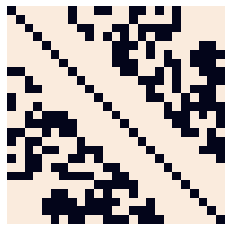

In [50]:
heatmap = sns.heatmap(adj, cbar=False, robust=True, square=True, xticklabels=False, yticklabels=False)

heatmap = heatmap.get_figure()
heatmap.savefig('report_figs/nws_coladj/nws_adj.png')

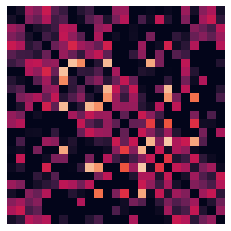

In [52]:
dynamics = sim.T[0]
col_adj = adj_to_coladj(adj, dynamics)
heatmap = sns.heatmap(col_adj, robust=True, square=True,
            xticklabels=False, yticklabels=False, 
            cbar=False,
            vmin=0, vmax=2*np.pi)

heatmap = heatmap.get_figure()
heatmap.savefig('report_figs/nws_coladj/nws0.png')

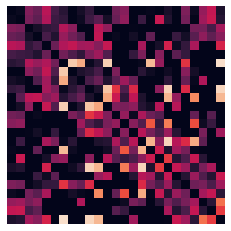

In [54]:
dynamics = sim.T[50]
col_adj = adj_to_coladj(adj, dynamics)
heatmap = sns.heatmap(col_adj, robust=True, square=True,
            xticklabels=False, yticklabels=False, 
            cbar=False,
            vmin=0, vmax=2*np.pi)

heatmap = heatmap.get_figure()
heatmap.savefig('report_figs/nws_coladj/nws50.png')

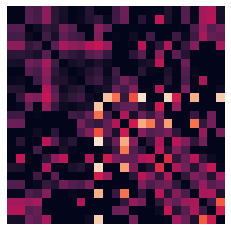

In [57]:
dynamics = sim.T[100]
col_adj = adj_to_coladj(adj, dynamics)
heatmap = sns.heatmap(col_adj, robust=True, square=True,
            xticklabels=False, yticklabels=False, 
            cbar=False,
            vmin=0, vmax=2*np.pi)

heatmap = heatmap.get_figure()
heatmap.savefig('report_figs/nws_coladj/nws100.png')

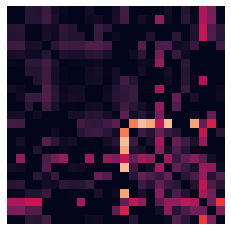

In [60]:
dynamics = sim.T[150]
col_adj = adj_to_coladj(adj, dynamics)
heatmap = sns.heatmap(col_adj, robust=True, square=True,
            xticklabels=False, yticklabels=False, 
            cbar=False,
            vmin=0, vmax=2*np.pi)

heatmap = heatmap.get_figure()
heatmap.savefig('report_figs/nws_coladj/nws150.png')

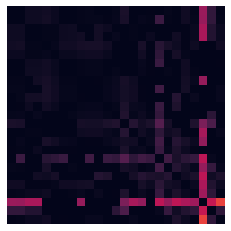

In [62]:
dynamics = sim.T[200]
col_adj = adj_to_coladj(adj, dynamics)
heatmap = sns.heatmap(col_adj, robust=True, square=True,
            xticklabels=False, yticklabels=False, 
            cbar=False,
            vmin=0, vmax=2*np.pi)

heatmap = heatmap.get_figure()
heatmap.savefig('report_figs/nws_coladj/nws200.png')

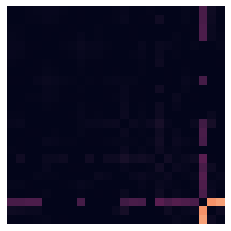

In [64]:
dynamics = sim.T[250]
col_adj = adj_to_coladj(adj, dynamics)
heatmap = sns.heatmap(col_adj, robust=True, square=True,
            xticklabels=False, yticklabels=False, 
            cbar=False,
            vmin=0, vmax=2*np.pi)

heatmap = heatmap.get_figure()
heatmap.savefig('report_figs/nws_coladj/nws250.png')

In [65]:
model = Kuramoto(
    coupling=1.5,
    dt=0.01,
    T=100,
    n_nodes=50,
    base_iter=126,
    natfreqs=None,
    half_sync=False
)

In [66]:
G = nx.cycle_graph(50)
adj = nx.to_numpy_array(G)
sim = model.run(adj)

In [67]:
for i in range(1, 1000):
    if predict_concentration(sim.T[i]) < np.pi:
        print(i)
        break

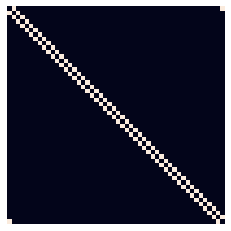

In [68]:
heatmap = sns.heatmap(adj, cbar=False, robust=True, square=True, xticklabels=False, yticklabels=False)

heatmap = heatmap.get_figure()
heatmap.savefig('report_figs/cyc_coladj/cyc_adj.png')

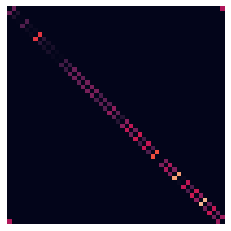

In [70]:
dynamics = sim.T[0]
col_adj = adj_to_coladj(adj, dynamics)
heatmap = sns.heatmap(col_adj, robust=True, square=True,
            xticklabels=False, yticklabels=False, 
            cbar=False,
            vmin=0, vmax=2*np.pi);

heatmap = heatmap.get_figure()
heatmap.savefig('report_figs/cyc_coladj/cyc0.png')

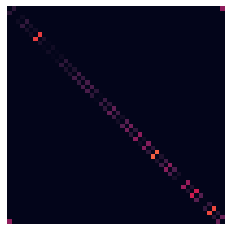

In [71]:
dynamics = sim.T[50]
col_adj = adj_to_coladj(adj, dynamics)
heatmap = sns.heatmap(col_adj, robust=True, square=True,
            xticklabels=False, yticklabels=False, 
            cbar=False,
            vmin=0, vmax=2*np.pi);

heatmap = heatmap.get_figure()
heatmap.savefig('report_figs/cyc_coladj/cyc50.png')

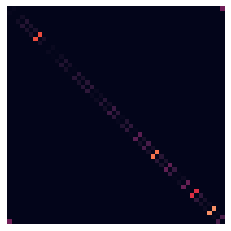

In [73]:
dynamics = sim.T[100]
col_adj = adj_to_coladj(adj, dynamics)
heatmap = sns.heatmap(col_adj, robust=True, square=True,
            xticklabels=False, yticklabels=False, 
            cbar=False,
            vmin=0, vmax=2*np.pi);

heatmap = heatmap.get_figure()
heatmap.savefig('report_figs/cyc_coladj/cyc100.png')

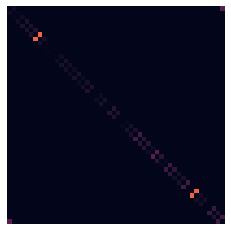

In [74]:
dynamics = sim.T[150]
col_adj = adj_to_coladj(adj, dynamics)
heatmap = sns.heatmap(col_adj, robust=True, square=True,
            xticklabels=False, yticklabels=False, 
            cbar=False,
            vmin=0, vmax=2*np.pi);

heatmap = heatmap.get_figure()
heatmap.savefig('report_figs/cyc_coladj/cyc150.png')

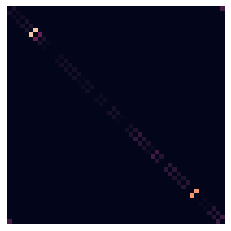

In [75]:
dynamics = sim.T[200]
col_adj = adj_to_coladj(adj, dynamics)
heatmap = sns.heatmap(col_adj, robust=True, square=True,
            xticklabels=False, yticklabels=False, 
            cbar=False,
            vmin=0, vmax=2*np.pi);

heatmap = heatmap.get_figure()
heatmap.savefig('report_figs/cyc_coladj/cyc200.png')

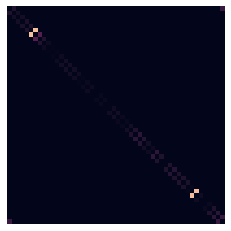

In [76]:
dynamics = sim.T[250]
col_adj = adj_to_coladj(adj, dynamics)
heatmap = sns.heatmap(col_adj, robust=True, square=True,
            xticklabels=False, yticklabels=False, 
            cbar=False,
            vmin=0, vmax=2*np.pi);

heatmap = heatmap.get_figure()
heatmap.savefig('report_figs/cyc_coladj/cyc250.png')